In [472]:
import pandas as pd

In [473]:
import os


dir_path = '3d_scan'

directory = []

for file_path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, file_path)):
        directory.append(file_path)
print(directory)

['0_0.csv', '0_37.csv', '0_57.csv', '0_78.csv', '0_98.csv', '10_18.csv', '10_38.csv', '10_57.csv', '10_78.csv', '10_98.csv', '11_18.csv', '11_38.csv', '11_57.csv', '11_78.csv', '11_98.csv', '12_18.csv', '12_38.csv', '12_57.csv', '12_78.csv', '12_98.csv', '13_18.csv', '13_38.csv', '13_57.csv', '13_78.csv', '13_98.csv', '14_18.csv', '14_38.csv', '14_57.csv', '14_78.csv', '14_98.csv', '15_18.csv', '15_38.csv', '15_57.csv', '15_78.csv', '15_98.csv', '16_18.csv', '16_37.csv', '16_57.csv', '16_77.csv', '16_97.csv', '17_18.csv', '17_37.csv', '17_57.csv', '17_77.csv', '17_97.csv', '18_18.csv', '18_37.csv', '18_57.csv', '18_77.csv', '18_97.csv', '19_18.csv', '19_37.csv', '19_57.csv', '19_9.csv', '1_18.csv', '1_37.csv', '1_58.csv', '1_77.csv', '1_98.csv', '20_1.csv', '20_3.csv', '20_5.csv', '20_7.csv', '20_9.csv', '21_1.csv', '21_3.csv', '21_5.csv', '21_7.csv', '21_77.csv', '21_97.csv', '22_18.csv', '22_5.csv', '22_7.csv', '22_9.csv', '23_1.csv', '23_3.csv', '23_5.csv', '23_7.csv', '23_9.csv', '

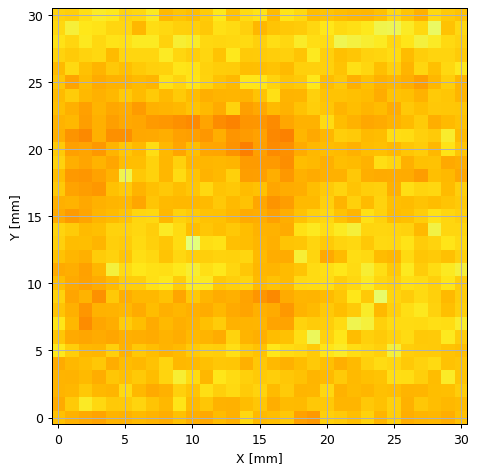

In [474]:

from matplotlib import pyplot as plt
import numpy as np


data = pd.read_csv(dir_path + "/" +directory[-1],index_col=0)
data = data.astype('complex')
data = data.to_numpy()

local_z = np.array(data.real, copy=True)

fig = plt.figure(figsize=(6, 6), dpi=90)
fig.tight_layout()
axes = fig.add_subplot(111)
axes.set_xlabel("X [mm]")
axes.set_ylabel("Y [mm]")
axes.grid()


# if not np.isnan(local_z).all():
#     z_mean = np.mean(local_z[~np.isnan(local_z)])
#     local_z[np.isnan(local_z)] = z_mean

im = axes.imshow(
    local_z,
    cmap="Wistia",
    vmin=np.min(local_z),
    vmax=np.max(local_z),
    # extent=[z.x_min, z.x_max, z.y_min, z.y_max],
    interpolation="none",
    origin="lower",
) 

# axes.set_xlim([z.x_min, z.x_max])
# axes.set_ylim([z.y_min, z.y_max])

plt.show()